# Data Understanding

The Homicide Reports, 1980-2014 dataset is very large. In total, there are 638,454 instances of reported homicides. The dataset is a part of the Murder Accountability Project, which is a nonprofit group organized in 2015 and dedicated to educate Americans on the importance of accurately accounting for unsolved homicides within the United States.In our project, we have used the homicide dataset from 1980 to 2014 to predict the perpetrator's sex, age and race. First we analyze the dataset in terms of State, Year, characteristics of victims and perpetrators, Relationship and Weapon.


The goal of our project is to help FBI to narrow down the search range for the perpetrators to solve the homicides more efficiently and make easier the labour of geographical plotting. This data set has 638454 instances and 24 attribute The actual data is from the FBI’s Uniform Crime Report’s “Return A” showing summaries of total homicides committed and cleared through arrest for the years 1980 through 2014. To start off, here is the structure and summary of the data:


In [291]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [292]:
df = pd.read_csv(r'C:\Users\Namrata\Desktop\ITU\Fall_2017\Data_Science\u-s-homicide-reports-1980-2014\data.csv', decimal=',')
df.head(5)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [293]:
df.shape

(638454, 24)

In [294]:
df.describe

<bound method DataFrame.describe of         Record ID Agency Code                Agency Name       Agency Type  \
0               1     AK00101                  Anchorage  Municipal Police   
1               2     AK00101                  Anchorage  Municipal Police   
2               3     AK00101                  Anchorage  Municipal Police   
3               4     AK00101                  Anchorage  Municipal Police   
4               5     AK00101                  Anchorage  Municipal Police   
5               6     AK00101                  Anchorage  Municipal Police   
6               7     AK00101                  Anchorage  Municipal Police   
7               8     AK00101                  Anchorage  Municipal Police   
8               9     AK00101                  Anchorage  Municipal Police   
9              10     AK00101                  Anchorage  Municipal Police   
10             11     AK00101                  Anchorage  Municipal Police   
11             12     AK0010

In [295]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

Axes(0.125,0.125;0.775x0.755)


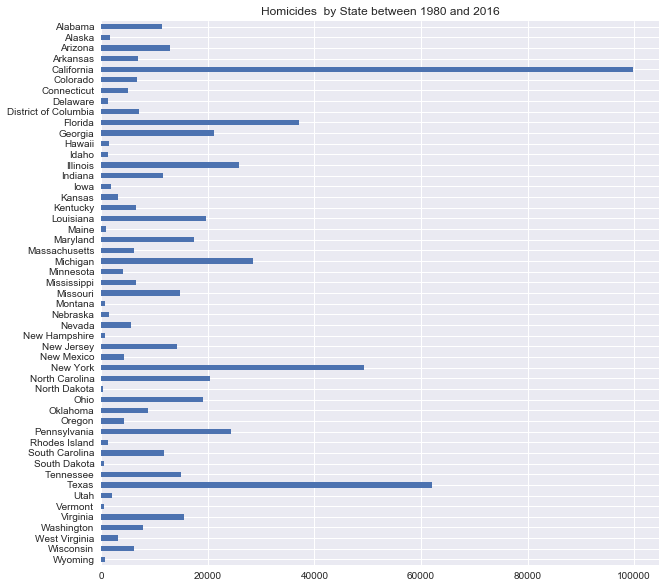

In [296]:
#Crimes by State
state = pd.DataFrame(df, columns = ['State']) 
count_states = state.stack().value_counts()
states = count_states.sort_index(axis=0, ascending=False)
#plot the total of homicides
print(states.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(10, 10), title='Homicides  by State between 1980 and 2016'))

In [297]:
#Top cities with maximum crime incidences reported
df.City.value_counts()[:5]

Los Angeles    44511
New York       38431
Cook           22383
Wayne          19904
Harris         16331
Name: City, dtype: int64

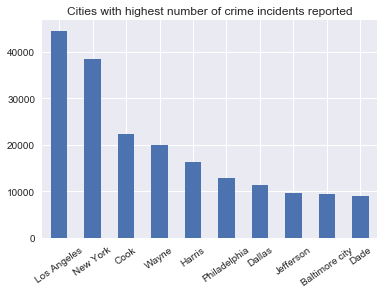

In [298]:
#Cities with highest counts of crimes reported
city_count = df.City.value_counts()[:10]
ax = city_count.plot(kind = 'bar', rot = 35, title = 'Cities with highest number of crime incidents reported')

In [299]:
#Top 10 states with reported crime
df.State.value_counts()[:5]

California    99783
Texas         62095
New York      49268
Florida       37164
Michigan      28448
Name: State, dtype: int64

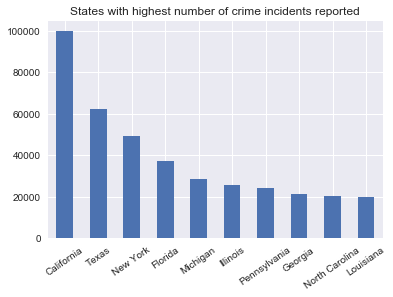

In [300]:
#State with highest crime reported
state_count = df.State.value_counts()[:10]
ax = state_count.plot(kind = 'bar', rot = 35, title = 'States with highest number of crime incidents reported')

In [301]:
#type of manslaughter
df['Crime Type'].value_counts()

Murder or Manslaughter        629338
Manslaughter by Negligence      9116
Name: Crime Type, dtype: int64

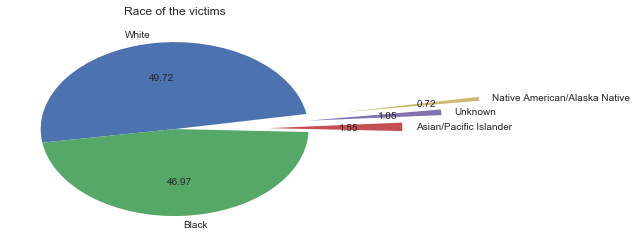

In [285]:
#Race of Victims
race = pd.DataFrame(df, columns = ['Victim Race']) 
count_race = race.stack().value_counts()
ax = count_race.plot(kind = 'pie',
                              title = 'Race of the victims', startangle = 10, autopct='%.2f', explode=(0, 0, 0.7, 1, 1.3))
ax.set_ylabel('')

Axes(0.125,0.125;0.775x0.755)


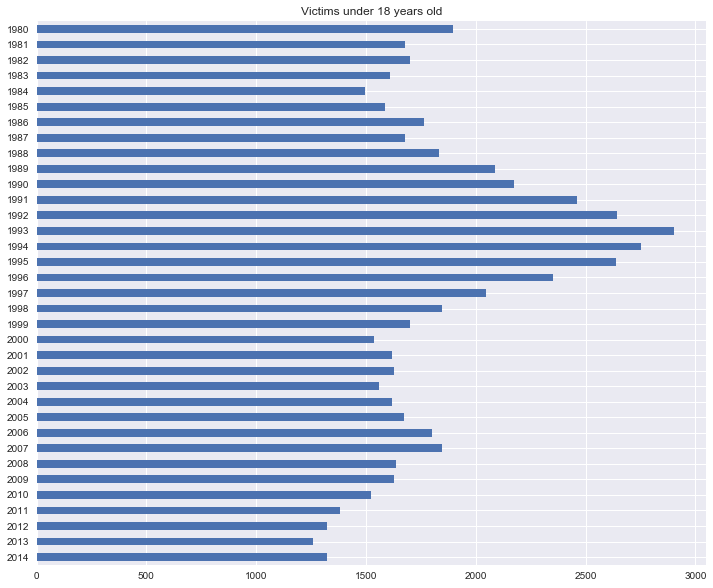

In [245]:
#Victims under 18

df['Victim Age'] = df['Victim Age'].astype("int")
mask = (df['Victim Age'] < 18)
young_victims =  pd.DataFrame(df.loc[mask], columns = ['Year']) 
count_years = young_victims.stack().value_counts()
homicides_young = count_years.sort_index(axis=0, ascending=False)
mask2 = (df['Victim Age'] > 18)
adult_victims =  pd.DataFrame(df.loc[mask2], columns = ['Year']) 
count_years = adult_victims.stack().value_counts()
homicides_adult = count_years.sort_index(axis=0, ascending=False)
print(homicides_young.plot(kind='barh', fontsize=10,  width=0.5,  figsize=(12, 10), title='Victims under 18 years old'))

In [246]:
df['Perpetrator Race'].value_counts()

White                            218243
Black                            214516
Unknown                          196047
Asian/Pacific Islander             6046
Native American/Alaska Native      3602
Name: Perpetrator Race, dtype: int64

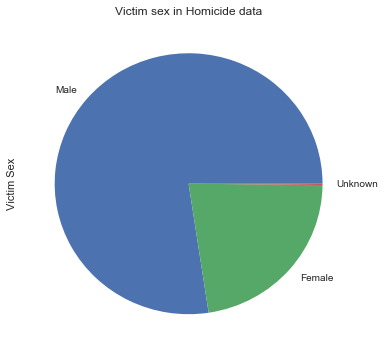

In [247]:
##Sex of the victims
sex = df['Victim Sex'].value_counts()
sex.plot.pie(figsize=(6, 6), title = 'Victim sex in Homicide data')

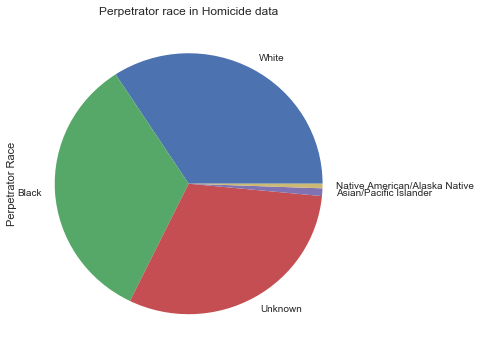

In [249]:
#Perpetrator Race
race = df['Perpetrator Race'].value_counts()
race.plot.pie(figsize=(6, 6), title = 'Perpetrator race in Homicide data')

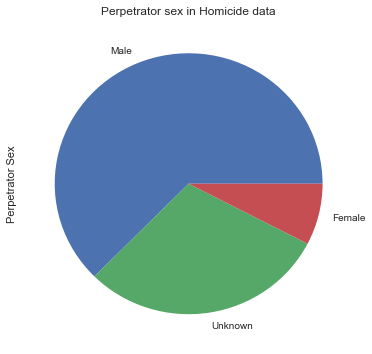

In [250]:
#Perpetrator Sex
sex = df['Perpetrator Sex'].value_counts()
sex.plot.pie(figsize=(6, 6), title = 'Perpetrator sex in Homicide data')

In [251]:
df['Weapon'].value_counts()[:5]

Handgun         317484
Knife            94962
Blunt Object     67337
Firearm          46980
Unknown          33192
Name: Weapon, dtype: int64

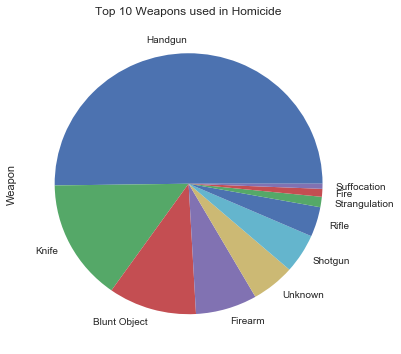

In [252]:
weapon = df['Weapon'].value_counts()[:10]
weapon.plot.pie(figsize=(6, 6), title = 'Top 10 Weapons used in Homicide')

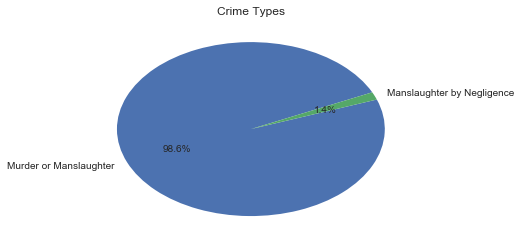

In [305]:
#Crime types
crime_types = pd.DataFrame(df, columns = ['Crime Type']) 
count_types = crime_types.stack().value_counts() 
count_crime_types = count_types.sort_index(axis=0, ascending=False)
#plot the total of homicides

ax = count_crime_types.plot(kind = 'pie', title = 'Crime Types', startangle = 25, autopct='%1.1f%%')
ax.set_ylabel('')

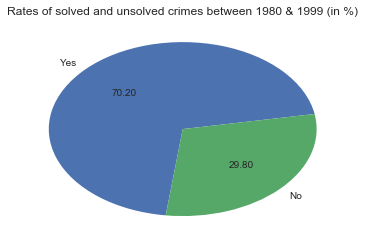

In [306]:
## Rate of crime's solved from 1980 - 1999

solved = pd.DataFrame(df, columns = ['Crime Solved']) 
resolution = solved.stack().value_counts()
ax = resolution.plot(kind = 'pie', title = 'Rates of solved and unsolved crimes between 1980 & 1999 (in %)', 
                     startangle = 10, 
                     autopct='%.2f')
ax.set_ylabel('')

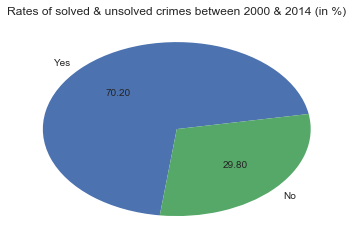

In [255]:
## Rate of crime's solved from 2000 - 2014

solved = pd.DataFrame(df, columns = ['Crime Solved']) 
resolution = solved.stack().value_counts()
ax = resolution.plot(kind = 'pie',
                              title = 'Rates of solved & unsolved crimes between 2000 & 2014 (in %)',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')

In [256]:
MO_NormalisedPercentage.T.idxmax()unsolved = df[df["Crime Solved"] != "Yes"]
unsolved.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
8,9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
10,11,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,July,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
14,15,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,August,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI


In [257]:
unsolved.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,190282.000000,190282.000000,190282.000000,190282.000000,190282.000000,190282.000000
mean,326560.985979,1996.203934,25.797112,37.448434,0.101476,0.035284
std,180532.149703,9.753870,89.272799,57.194890,0.431139,0.209370
min,3.000000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,176764.500000,1988.000000,1.000000,22.000000,0.000000,0.000000
50%,327459.500000,1995.000000,4.000000,29.000000,0.000000,0.000000
75%,482565.500000,2005.000000,16.000000,41.000000,0.000000,0.000000
max,638450.000000,2014.000000,999.000000,998.000000,9.000000,8.000000


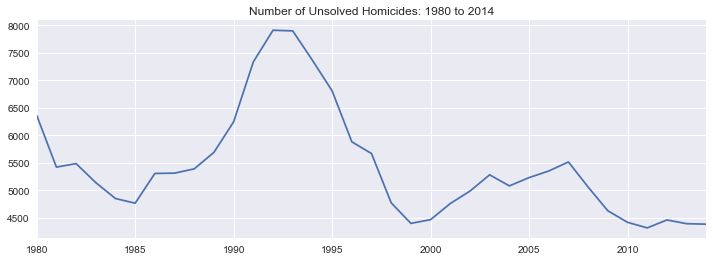

In [258]:
plt.rcParams["figure.figsize"] = (12,4)
unsolved['Year'].value_counts().sort_index(ascending=True).plot(kind='line')
plt.title('Number of Unsolved Homicides: 1980 to 2014')

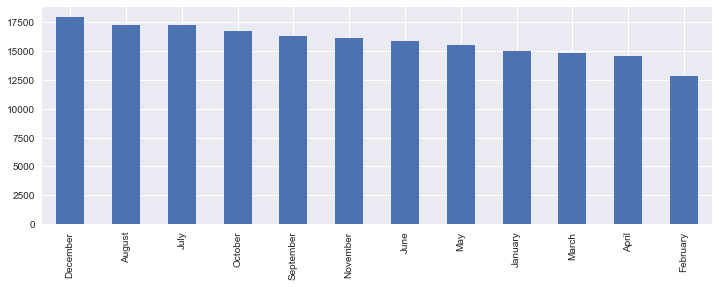

In [259]:
unsolved["Month"].value_counts().plot(kind="bar")

# Now let's find out the kind of agencies contributed to the unsolved homicide statistics.

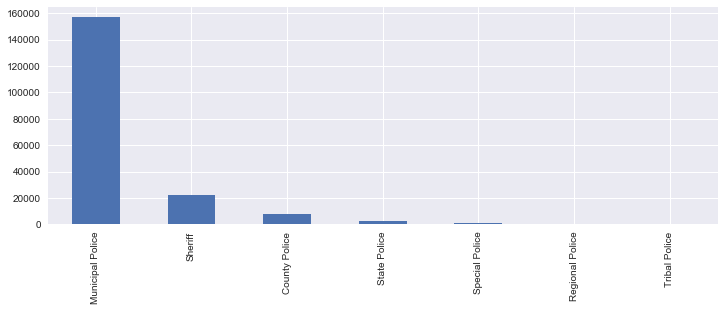

In [260]:
unsolved["Agency Type"].value_counts().plot(kind="bar")
#plt.yscale('log', nonposy='clip')

# Exploring Relationship Between Victims and Perpetrators

In [261]:
df["Relationship"].unique()

array(['Acquaintance', 'Unknown', 'Wife', 'Stranger', 'Girlfriend',
       'Ex-Husband', 'Brother', 'Stepdaughter', 'Husband', 'Sister',
       'Friend', 'Family', 'Neighbor', 'Father', 'In-Law', 'Son',
       'Ex-Wife', 'Boyfriend', 'Mother', 'Common-Law Husband',
       'Common-Law Wife', 'Stepfather', 'Stepson', 'Stepmother',
       'Daughter', 'Boyfriend/Girlfriend', 'Employer', 'Employee'], dtype=object)

In [262]:
known = df[df["Relationship"] != "Unknown"]
known.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI


In [263]:
known["Relationship"].value_counts()

Acquaintance            126018
Stranger                 96593
Wife                     23187
Friend                   21945
Girlfriend               16465
Son                       9904
Family                    9535
Husband                   8803
Daughter                  7539
Boyfriend                 7302
Neighbor                  6294
Brother                   5514
Father                    4361
Mother                    4248
In-Law                    3637
Common-Law Wife           2477
Ex-Wife                   1973
Common-Law Husband        1954
Boyfriend/Girlfriend      1383
Stepfather                1360
Sister                    1292
Stepson                   1170
Stepdaughter               754
Ex-Husband                 629
Employer                   509
Employee                   384
Stepmother                 211
Name: Relationship, dtype: int64

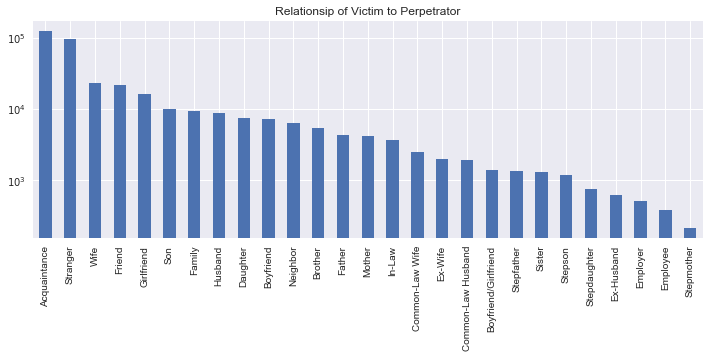

In [264]:
plt.rcParams["figure.figsize"] = (12,4)
known["Relationship"].value_counts().plot(kind="bar")
plt.title("Relationsip of Victim to Perpetrator")
plt.yscale('log', nonposy='clip')

# Is there a racial angle to these homicides?

In [265]:
df["Perpetrator Race"].unique()

array(['Native American/Alaska Native', 'White', 'Unknown', 'Black',
       'Asian/Pacific Islander'], dtype=object)

In [304]:
df.drop['Unknown']

TypeError: 'instancemethod' object has no attribute '__getitem__'

In [266]:
df.columns

Index([u'Record ID', u'Agency Code', u'Agency Name', u'Agency Type', u'City',
       u'State', u'Year', u'Month', u'Incident', u'Crime Type',
       u'Crime Solved', u'Victim Sex', u'Victim Age', u'Victim Race',
       u'Victim Ethnicity', u'Perpetrator Sex', u'Perpetrator Age',
       u'Perpetrator Race', u'Perpetrator Ethnicity', u'Relationship',
       u'Weapon', u'Victim Count', u'Perpetrator Count', u'Record Source'],
      dtype='object')

In [267]:
pd.pivot_table(known,index=["Victim Race","Perpetrator Race"],values=["Victim Count"],aggfunc=[np.sum])
               #columns=["Product"],aggfunc=[np.sum])

sum
                                                            Victim Count
Victim Race                   Perpetrator Race                          
Asian/Pacific Islander        Asian/Pacific Islander                1139
                              Black                                  128
                              Native American/Alaska Native            9
                              Unknown                                 48
                              White                                  309
Black                         Asian/Pacific Islander                  23
                              Black                                11316
                              Native American/Alaska Native           11
                              Unknown                                266
                              White                                 1434
Native American/Alaska Native Asian/Pacific Islander                   0
                              Black                                   27
                              Native American/Alaska Native          263
                              Unknown                                 11
                              White                                  102
Unknown                       Asian/Pacific Islander                  12
                              Black                                  118
                              Native American/Alaska Native            2
                              Unknown                                210
                              White                                  199
White                         Asian/Pacific Islander                 181
                              Black                                 3414
                              Native American/Alaska Native          206
                              Unknown                                889
                              White                                27273

(array([ 0.5,  1.5,  2.5]), <a list of 3 Text yticklabel objects>)

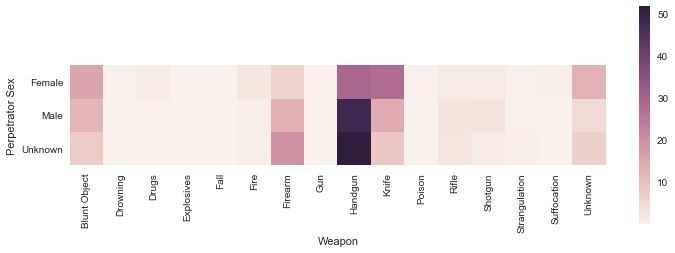

In [268]:
df4 = df.groupby(['Perpetrator Sex', 'Weapon'])['Incident'].sum().reset_index()
df4['pc'] = df4.groupby('Perpetrator Sex')['Incident'].apply(lambda x: 100 * x / x.sum())
f4, ax4 = plt.subplots()
sns.heatmap(df4.pivot(index='Perpetrator Sex', columns='Weapon', values='pc'), square=True, ax=ax4)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


In [269]:
pv_weapons = df.pivot_table(columns='Crime Solved', index='Weapon',values='Incident',aggfunc='count')
pv_weapons.sort_values(by='No', ascending=0)

Crime Solved,No,Yes
Weapon,,
Handgun,100546,216938
Firearm,22578,24402
Knife,20204,74758
Blunt Object,15833,51504
Unknown,14783,18409
Shotgun,4682,26040
Strangulation,3701,4409
Rifle,3401,19946
Fire,2034,4139


In [12]:
# Removing Record ID from the data set
#data_1=df.drop(['Record ID','Agency Code','Agency Name','Agency Type','Incident','Record Source'], 1)

In [62]:
#Review the distribution of the categorial features
#data_1.describe(include=['O'])

In [63]:
#df.head(2)

In [58]:
#process_df = df
#process_df.head()

,A,B,C,D
aaa,1.037733,0.176161,1.911137,0.624670
bbb,1.674787,0.997205,0.439444,0.114430
ccc,0.302218,0.259476,0.904315,1.367847
ddd,0.795313,0.709320,1.356714,1.240137
eee,0.005042,2.283497,0.520864,0.936344


In [59]:

#process_df['perp Sex Map To Num'] = pd.Series(1.0 , index=process_df.index)
p#rocess_df.head(2)

,A,B,C,D,perp Sex Map To Num
aaa,1.037733,0.176161,1.911137,0.62467,1.0
bbb,1.674787,0.997205,0.439444,0.11443,1.0


In [61]:
#process_df['perp Sex Map To Num'][process_df['Perpetrator Sex'] == "Male"] = 0.0
#process_df.head()

#  d.sales[d.sales==24] = 100

In [29]:
#process_df.Weapon.unique()

array(['Blunt Object', 'Strangulation', 'Unknown', 'Rifle', 'Knife',
       'Firearm', 'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
       'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison'], dtype=object)

In [85]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\Namrata\.spyder\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [180]:
df.drop(df.columns[[0,1,2,3,6,7,10,12,16,21,22,23]], axis=1, inplace=True)
df.head()

IndexError: index 12 is out of bounds for axis 0 with size 12

In [181]:
data2 = pd.get_dummies(data, columns = [ 'Victim Sex', 'Victim Race', 'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship'])

In [182]:
data2.drop(data2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]], axis=1, inplace=True)
data2.head()

,Victim Count,Perpetrator Count,Record Source,perp Sex Map To Num,Victim Sex_Female,Victim Sex_Male,Victim Sex_Unknown,Victim Race_Asian/Pacific Islander,Victim Race_Black,Victim Race_Native American/Alaska Native,...,Relationship_Neighbor,Relationship_Sister,Relationship_Son,Relationship_Stepdaughter,Relationship_Stepfather,Relationship_Stepmother,Relationship_Stepson,Relationship_Stranger,Relationship_Unknown,Relationship_Wife
0,0,0,FBI,0.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,FBI,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,FBI,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,FBI,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,FBI,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [183]:
data2.columns

Index([u'Victim Count', u'Perpetrator Count', u'Record Source',
       u'perp Sex Map To Num', u'Victim Sex_Female', u'Victim Sex_Male',
       u'Victim Sex_Unknown', u'Victim Race_Asian/Pacific Islander',
       u'Victim Race_Black', u'Victim Race_Native American/Alaska Native',
       u'Victim Race_Unknown', u'Victim Race_White',
       u'Victim Ethnicity_Hispanic', u'Victim Ethnicity_Not Hispanic',
       u'Victim Ethnicity_Unknown', u'Perpetrator Sex_Female',
       u'Perpetrator Sex_Male', u'Perpetrator Sex_Unknown',
       u'Perpetrator Race_Asian/Pacific Islander', u'Perpetrator Race_Black',
       u'Perpetrator Race_Native American/Alaska Native',
       u'Perpetrator Race_Unknown', u'Perpetrator Race_White',
       u'Perpetrator Ethnicity_Hispanic',
       u'Perpetrator Ethnicity_Not Hispanic', u'Perpetrator Ethnicity_Unknown',
       u'Relationship_Acquaintance', u'Relationship_Boyfriend',
       u'Relationship_Boyfriend/Girlfriend', u'Relationship_Brother',
       u'Relation

In [184]:
data2.drop(data2.columns[[0,1,2,3]], axis=1, inplace=True)
data2.head(2)

,Victim Sex_Female,Victim Sex_Male,Victim Sex_Unknown,Victim Race_Asian/Pacific Islander,Victim Race_Black,Victim Race_Native American/Alaska Native,Victim Race_Unknown,Victim Race_White,Victim Ethnicity_Hispanic,Victim Ethnicity_Not Hispanic,...,Relationship_Neighbor,Relationship_Sister,Relationship_Son,Relationship_Stepdaughter,Relationship_Stepfather,Relationship_Stepmother,Relationship_Stepson,Relationship_Stranger,Relationship_Unknown,Relationship_Wife
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
data2.columns

Index([u'Victim Sex_Female', u'Victim Sex_Male', u'Victim Sex_Unknown',
       u'Victim Race_Asian/Pacific Islander', u'Victim Race_Black',
       u'Victim Race_Native American/Alaska Native', u'Victim Race_Unknown',
       u'Victim Race_White', u'Victim Ethnicity_Hispanic',
       u'Victim Ethnicity_Not Hispanic', u'Victim Ethnicity_Unknown',
       u'Perpetrator Sex_Female', u'Perpetrator Sex_Male',
       u'Perpetrator Sex_Unknown', u'Perpetrator Race_Asian/Pacific Islander',
       u'Perpetrator Race_Black',
       u'Perpetrator Race_Native American/Alaska Native',
       u'Perpetrator Race_Unknown', u'Perpetrator Race_White',
       u'Perpetrator Ethnicity_Hispanic',
       u'Perpetrator Ethnicity_Not Hispanic', u'Perpetrator Ethnicity_Unknown',
       u'Relationship_Acquaintance', u'Relationship_Boyfriend',
       u'Relationship_Boyfriend/Girlfriend', u'Relationship_Brother',
       u'Relationship_Common-Law Husband', u'Relationship_Common-Law Wife',
       u'Relationship_Daughte

In [186]:
data2.drop(data2.columns[[17]], axis=1, inplace=True)

In [187]:
data2.columns


Index([u'Victim Sex_Female', u'Victim Sex_Male', u'Victim Sex_Unknown',
       u'Victim Race_Asian/Pacific Islander', u'Victim Race_Black',
       u'Victim Race_Native American/Alaska Native', u'Victim Race_Unknown',
       u'Victim Race_White', u'Victim Ethnicity_Hispanic',
       u'Victim Ethnicity_Not Hispanic', u'Victim Ethnicity_Unknown',
       u'Perpetrator Sex_Female', u'Perpetrator Sex_Male',
       u'Perpetrator Sex_Unknown', u'Perpetrator Race_Asian/Pacific Islander',
       u'Perpetrator Race_Black',
       u'Perpetrator Race_Native American/Alaska Native',
       u'Perpetrator Race_White', u'Perpetrator Ethnicity_Hispanic',
       u'Perpetrator Ethnicity_Not Hispanic', u'Perpetrator Ethnicity_Unknown',
       u'Relationship_Acquaintance', u'Relationship_Boyfriend',
       u'Relationship_Boyfriend/Girlfriend', u'Relationship_Brother',
       u'Relationship_Common-Law Husband', u'Relationship_Common-Law Wife',
       u'Relationship_Daughter', u'Relationship_Employee',
      

In [188]:
data2=data2.rename(columns = {'Perpetrator Race_Asian/Pacific Islander':'y' , 'Perpetrator Race_Black':'y1','Perpetrator Race_Native American/Alaska Native':'y2','Perpetrator Race_White':'y3'})

In [189]:
data2.columns

Index([u'Victim Sex_Female', u'Victim Sex_Male', u'Victim Sex_Unknown',
       u'Victim Race_Asian/Pacific Islander', u'Victim Race_Black',
       u'Victim Race_Native American/Alaska Native', u'Victim Race_Unknown',
       u'Victim Race_White', u'Victim Ethnicity_Hispanic',
       u'Victim Ethnicity_Not Hispanic', u'Victim Ethnicity_Unknown',
       u'Perpetrator Sex_Female', u'Perpetrator Sex_Male',
       u'Perpetrator Sex_Unknown', u'y', u'y1', u'y2', u'y3',
       u'Perpetrator Ethnicity_Hispanic',
       u'Perpetrator Ethnicity_Not Hispanic', u'Perpetrator Ethnicity_Unknown',
       u'Relationship_Acquaintance', u'Relationship_Boyfriend',
       u'Relationship_Boyfriend/Girlfriend', u'Relationship_Brother',
       u'Relationship_Common-Law Husband', u'Relationship_Common-Law Wife',
       u'Relationship_Daughter', u'Relationship_Employee',
       u'Relationship_Employer', u'Relationship_Ex-Husband',
       u'Relationship_Ex-Wife', u'Relationship_Family', u'Relationship_Father',
 

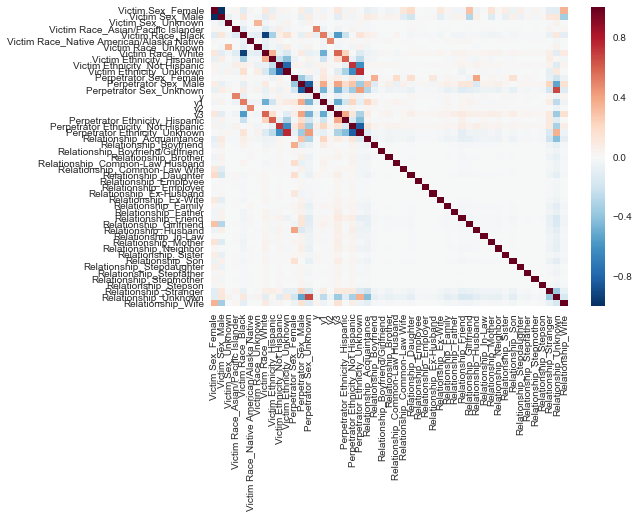

In [190]:
sns.heatmap(data2.corr())
plt.show()

In [191]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [192]:
X_train.shape


(478840, 48)

In [193]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [198]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print (confusion_matrix)


[[123778      0]
 [     0  35836]]


In [199]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [200]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

1.0


In [202]:
X = data2.iloc[:,1:]
y1 = data2.iloc[:,0]
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=0)

In [209]:
X_test.shape

(159614, 48)

In [208]:
y1_train.shape

(478840L,)

In [204]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [206]:
y1_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1_test, y1_pred)
print (confusion_matrix)


[[123778      0]
 [     0  35836]]


In [207]:
from sklearn.metrics import r2_score
print(r2_score(y1_test, y1_pred))

1.0
